Text(0, 0.5, 'real')

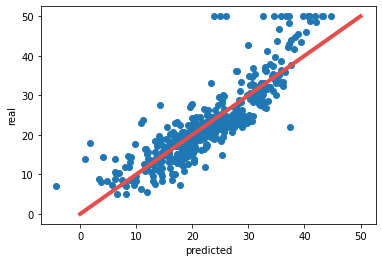

In [1]:
# This code is supporting material for the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing
# It is made available under the MIT License

# This script shows an example of simple (ordinary) linear regression

# The first edition of the book NumPy functions only for this operation. See
# the file boston1numpy.py for that version.

import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

boston = load_boston()
x = boston.data
y = boston.target

# Fitting a model is trivial: call the ``fit`` method in LinearRegression:
lr = LinearRegression()
lr.fit(x, y)


fig, ax = plt.subplots()
# Plot a diagonal (for reference):
ax.plot([0, 50], [0, 50], '-', color=(.9,.3,.3), lw=4)

# Plot the prediction versus real:
ax.scatter(lr.predict(x), boston.target)

ax.set_xlabel('predicted')
ax.set_ylabel('real')

Residual: 4.679191295697282


<ipython-input-2-98810be6355f>:19: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  s, total_error, _, _ = np.linalg.lstsq(x, y)


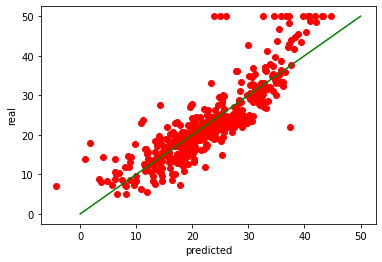

In [2]:
# This code is supporting material for the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing
#
# It is made available under the MIT License

# This script shows an example of simple (ordinary) linear regression

import numpy as np
from sklearn.datasets import load_boston
import pylab as plt

boston = load_boston()
x = np.array([np.concatenate((v, [1])) for v in boston.data])
y = boston.target

# np.linal.lstsq implements least-squares linear regression
s, total_error, _, _ = np.linalg.lstsq(x, y)

rmse = np.sqrt(total_error[0] / len(x))
print('Residual: {}'.format(rmse))

# Plot the prediction versus real:
plt.plot(np.dot(x, s), boston.target, 'ro')

# Plot a diagonal (for reference):
plt.plot([0, 50], [0, 50], 'g-')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

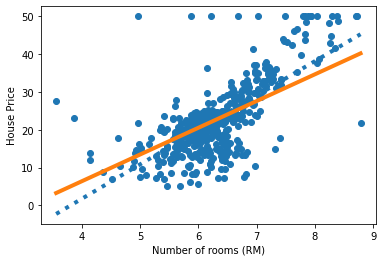

In [3]:
# This code is supporting material for the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing
#
# It is made available under the MIT License

from sklearn.linear_model import LinearRegression, Lasso
import numpy as np
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt

boston = load_boston()
fig, ax = plt.subplots()
ax.scatter(boston.data[:, 5], boston.target)
ax.set_xlabel("Number of rooms (RM)")
ax.set_ylabel("House Price")


x = boston.data[:, 5]
xmin = x.min()
xmax = x.max()
x = np.transpose(np.atleast_2d(x))
y = boston.target

lr = LinearRegression()
lr.fit(x, y)
ax.plot([xmin, xmax], lr.predict([[xmin], [xmax]]), ':', lw=4, label='OLS model')

las = Lasso()
las.fit(x, y)
ax.plot([xmin, xmax], las.predict([ [xmin], [xmax] ]), '-', lw=4, label='Lasso model')

RMSE: 4.7.
R2: 0.74.


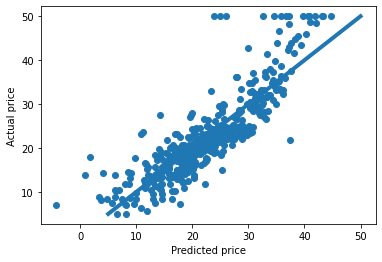

In [4]:
# This code is supporting material for the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing
#
# It is made available under the MIT License


# This script plots prediction-vs-actual on training set for the Boston dataset
# using OLS regression
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

boston = load_boston()

x = boston.data
y = boston.target

lr = LinearRegression()
lr.fit(x, y)
p = lr.predict(x)
print("RMSE: {:.2}.".format(np.sqrt(mean_squared_error(y, p))))
print("R2: {:.2}.".format(lr.score(x, y)))
fig,ax = plt.subplots()
ax.scatter(p, y)
ax.set_xlabel('Predicted price')
ax.set_ylabel('Actual price')
ax.plot([y.min(), y.max()], [y.min(), y.max()], lw=4)

fig.savefig('Figure4.png')

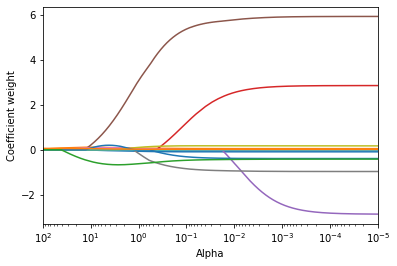

In [20]:
# This code is supporting material for the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing
#
# It is made available under the MIT License

from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
import numpy as np

boston = load_boston()
x = boston.data
y = boston.target

las = Lasso(normalize=1)
alphas = np.logspace(-5, 2, 1000)
alphas, coefs, _= las.path(x, y, alphas=alphas)

fig,ax = plt.subplots()
ax.plot(alphas, coefs.T)
ax.set_xscale('log')
ax.set_xlim(alphas.max(), alphas.min())
ax.set_xlabel('Lasso coefficient path as a function of alpha')
ax.set_xlabel('Alpha')
ax.set_ylabel('Coefficient weight')
fig.savefig('Figure_LassoPath.png')

In [6]:
  # This code is supporting material for the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing
#
# It is made available under the MIT License

import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold



data, target = load_svmlight_file('E2006.train')



met = ElasticNet(alpha=0.1)
#kf = KFold(len(x), n_folds = 5)
kf = KFold(n_splits=5, shuffle=True)
p = np.zeros_like(y)
#for train, test in kf:
for train, test in kf.split(x):
    lr.fit(x[train], y[train])
    p[test] = lr.predict(x[test])
rmse_cv = np. sqrt(mean_squared_error(p, y))
#print('RMSE on 5-fold CV: {:.2}'.format(rmse_cv))
#print('[EN CV] R2 on testing (5 fold), {:.2}'.format(r2_score(target, pred)))
#print('')
# RMSE on 5-fold CV: 5.6

met.fit(data, target)
pred = met.predict(data)
#print('[EN CV] RMSE on training, {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
#print('[EN CV] R2 on training, {:.2}'.format(r2_score(target, pred)))

# Construct an ElasticNetCV object (use all available CPUs)
met = ElasticNetCV(n_jobs=-1, l1_ratio=[.01, .05, .25, .5, .75, .95, .99])

[EN CV] RMSE on training, 0.4
[EN CV] R2 on training, 0.61


In [7]:
print('Min target value: {}'.format(target.min()))
print('Max target value: {}'.format(target.max()))
print('Mean target value: {}'.format(target.mean()))
print('Std. dev. target value: {}'.format(target.std()))

Min target value: -7.89957807346873
Max target value: -0.519409526940154
Mean target value: -3.5140531366944456
Std. dev. target value: 0.6322783539114604


In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(data,target)
pred = lr.predict(data)
rmse_train = np.sqrt(mean_squared_error(target,pred))
print('RMSE on training: {:.2}'.format(rmse_train))
print('R2 on training: {:.2}'.format(r2_score(target,pred)))

RMSE on training: 0.00053
R2 on training: 1.0


In [13]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
met = ElasticNet(alpha=0.1)

kf = KFold(n_splits=5, shuffle=True)
pred = np.zeros_like(target)


print('[EN CV] RMSE on testing (5 fold), {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('[EN CV] R2 on testing (5 fold), {:.2}'.format(r2_score(target, pred)))
print('')

[EN CV] RMSE on testing (5 fold), 3.6
[EN CV] R2 on testing (5 fold), -3.1e+01



In [19]:
met.fit(data, target)
pred = met.predict(data)
print('[EN CV] RMSE on training, {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('[EN CV] R2 on training, {:.2}'.format(r2_score(target, pred)))

[EN CV] RMSE on training, 0.4
[EN CV] R2 on training, 0.61
R2 ElasticNetCV: 0.61


In [ ]:
r2_cv = r2_score(target,pred)
print('R2 ElasticNetCV: {:.2}'.format(r2_cv))

Text(0, 0.5, 'Predicted value')

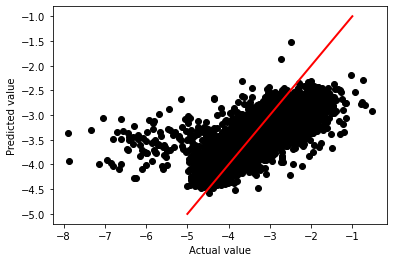

In [11]:
fig, ax = plt.subplots()
y = target
ax.scatter(y, pred, c='k')
ax.plot([-5,-1], [-5,-1], 'r-', lw=2)
ax.set_xlabel('Actual value')
ax.set_ylabel('Predicted value')